<a href="https://colab.research.google.com/github/misbahsy/APMonitor-do/blob/master/DynamicOptimizationBenchmarks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Optimal Control Problems



##Exercise
<p><strong>Objective:</strong> Set up and solve <strong>three</strong> of the five <a class='urllink' href='http://apmonitor.com/do/uploads/Main/Dynamic_Optimization_Benchmarks.pdf' rel='nofollow'>dynamic optimization benchmark problems</a><sup>2</sup>. Create a program to optimize and display the results. <em>Estimated Time (each): 30 minutes</em>
</p>
<div class='vspace'></div><hr />
<div class='vspace'></div>

<h2>Example 1a</h2>
<ul><li>Nonlinear, unconstrained, minimize final state
</li></ul><p class='vspace'>$$\min_{u(t)} x_2 \left( t_f \right)$$
$$\mathrm{subject \; to}$$
$$\frac{dx_1}{dt}=u$$
$$\frac{dx_2}{dt}=x_1^2 + u^2$$
$$x(0) = [1 \; 0]^T$$
$$t_f=1$$
</p>
<div class='vspace'></div><h2>Example 1b</h2>
<ul><li>Nonlinear, unconstrained, minimize final state with terminal constraint
</li></ul><p class='vspace'>$$\min_{u(t)} x_2 \left( t_f \right)$$
$$\mathrm{subject \; to}$$
$$\frac{dx_1}{dt}=u$$
$$\frac{dx_2}{dt}=x_1^2 + u^2$$
$$x(0) = [1 \; 0]^T$$
$$x_1 \left( t_f \right)=1$$
$$t_f=1$$
</p>
<div class='vspace'></div><h4>Solutions to Benchmarks 1a and 1b</h4>
<div><img src='http://apmonitor.com/do/uploads/Main/download.png' alt='' title='' /> <a class='urllink' href='http://apmonitor.com/do/uploads/Main/dynamic_optimization_benchmark1.zip' rel='nofollow'>Dynamic Optimization Benchmark 1a and 1b in MATLAB and Python</a></div>


In [2]:
#@title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/mmCFF3-6sGg" frameborder="0" allowfullscreen></iframe>

apm 35.231.160.17_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.8.7
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            0
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:            500
 Number of total equations: -          400
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            100
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

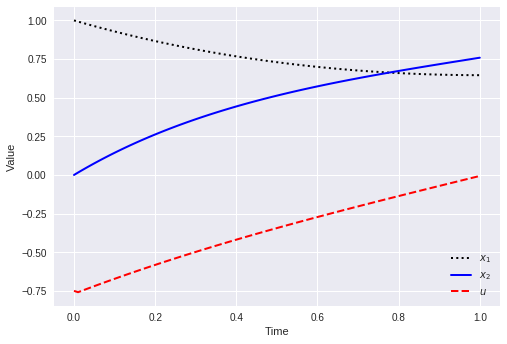

In [3]:
#@markdown ###Solution for 1a using GEKKO

try:
    from pip import main as pipmain
except:
    from pip._internal import main as pipmain
pipmain(['install','gekko'])

import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

m = GEKKO()

nt = 101
m.time = np.linspace(0,1,nt)

# Variables
x1 = m.Var(value=1)
x2 = m.Var(value=0)
u = m.Var(value=-0.75)

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

# Equations
m.Equation(x1.dt()==u)
m.Equation(x2.dt()==x1**2 + u**2)

# Objective Function
m.Obj(x2*final)

m.options.IMODE = 6
m.solve()

plt.figure(1)
plt.plot(m.time,x1.value,'k:',LineWidth=2,label=r'$x_1$')
plt.plot(m.time,x2.value,'b-',LineWidth=2,label=r'$x_2$')
plt.plot(m.time,u.value,'r--',LineWidth=2,label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

apm 35.231.160.17_gk_model1 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.8.7
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            0
   Equations    :            4
   Residuals    :            4
 
 Number of state variables:            500
 Number of total equations: -          500
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

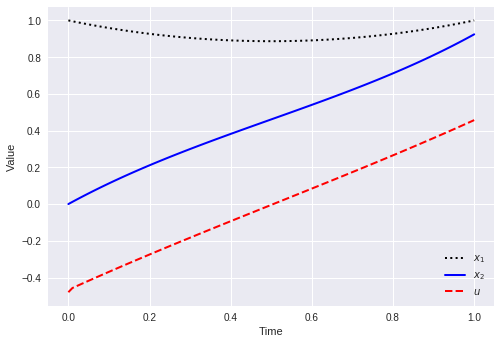

In [4]:
#@markdown ###Solution for 1b using GEKKO

import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

m = GEKKO()

nt = 101
m.time = np.linspace(0,1,nt)

# Variables
x1 = m.Var(value=1)
x2 = m.Var(value=0)
u = m.Var(value=-0.48)

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

# Equations
m.Equation(x1.dt()==u)
m.Equation(x2.dt()==x1**2 + u**2)
m.Equation(final*(x1-1)==0)

# Objective Function
m.Obj(x2*final)

m.options.IMODE = 6
m.solve()

plt.figure(1)
plt.plot(m.time,x1.value,'k:',LineWidth=2,label=r'$x_1$')
plt.plot(m.time,x2.value,'b-',LineWidth=2,label=r'$x_2$')
plt.plot(m.time,u.value,'r--',LineWidth=2,label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [5]:
#@title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/WHnIfKUfjQY" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>


##Example 2
<ul><li>Nonlinear, constrained, minimize final state
</li></ul><p class='vspace'>$$\min_{u(t)} x_4 \left( t_f \right)$$
$$\mathrm{subject \; to}$$
$$\frac{dx_1}{dt}=x_2$$
$$\frac{dx_2}{dt}=-x_3 \, u + 16 \, t - 8$$
$$\frac{dx_3}{dt}=u$$
$$\frac{dx_4}{dt}=x_1^2+x_2^2+0.0005 \left(x_2 + 16 \, t -8 -0.1x_3\,u^2\right)^2$$
$$x(0) = [0 \; -1 \; -\sqrt{5} \; 0]^T$$
$$-4 \le u \le 10$$
$$t_f=1$$
</p>
<div class='vspace'></div><h4>Solution to Benchmark 2</h4>
<div><img src='http://apmonitor.com/do/uploads/Main/download.png' alt='' title='' /> <a class='urllink' href='http://apmonitor.com/do/uploads/Main/dynamic_optimization_benchmark2.zip' rel='nofollow'>Dynamic Optimization Benchmark 2 in MATLAB and Python</a></div>

In [6]:
#@title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/JP2rH7IPYvc" frameborder="0" allowfullscreen></iframe>


apm 35.231.160.17_gk_model2 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.8.7
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            7
   Intermediates:            0
   Connections  :            0
   Equations    :            6
   Residuals    :            6
 
 Number of state variables:           3700
 Number of total equations: -         3600
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            100
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

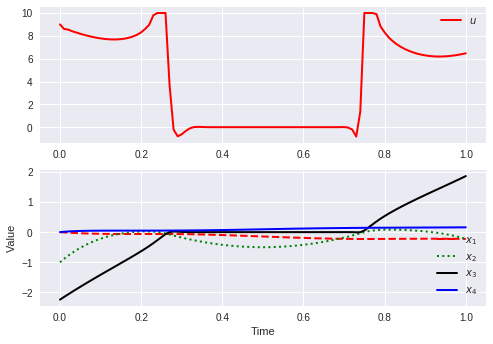

In [7]:
#@markdown ##Solution for 2 using GEKKO
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

m = GEKKO()

nt = 101
m.time = np.linspace(0,1,nt)

# Parameters
u = m.MV(value=9,lb=-4,ub=10)
u.STATUS = 1
u.DCOST = 0

# Variables
t = m.Var(value=0)
x1 = m.Var(value=0)
x2 = m.Var(value=-1)
x3 = m.Var(value=-np.sqrt(5))
x4 = m.Var(value=0)

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

# Equations
m.Equation(t.dt()==1)
m.Equation(x1.dt()==x2)
m.Equation(x2.dt()==-x3*u+16*t-8)
m.Equation(x3.dt()==u)
m.Equation(x4.dt()==x1**2+x2**2 \
           +0.005*(x2+16*t-8-0.1*x3*(u**2))**2)

# Objective Function
m.Obj(x4*final)

m.options.IMODE = 6
m.options.NODES = 4
m.options.MV_TYPE = 1
m.options.SOLVER = 3
m.solve()

print(m.path)

print('Objective = min x4(tf): ' + str(x4[-1]))

plt.figure(1)
plt.subplot(2,1,1)
plt.plot(m.time,u,'r-',LineWidth=2,label=r'$u$')
plt.legend(loc='best')
plt.subplot(2,1,2)
plt.plot(m.time,x1.value,'r--',LineWidth=2,label=r'$x_1$')
plt.plot(m.time,x2.value,'g:',LineWidth=2,label=r'$x_2$')
plt.plot(m.time,x3.value,'k-',LineWidth=2,label=r'$x_3$')
plt.plot(m.time,x4.value,'b-',LineWidth=2,label=r'$x_4$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [8]:
#@title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/dxC__nDnmCY" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>


##Example 3
<ul><li>Tubular reactor with parallel reaction 
</li></ul><p class='vspace'>$$\max_{u(t)} x_2 \left( t_f \right)$$
$$\mathrm{subject \; to}$$
$$\frac{dx_1}{dt}=-\left(u+0.5u^2\right) x_1$$
$$\frac{dx_2}{dt}=u \, x_1$$
$$x(0) = [1 \; 0]^T$$
$$0 \le u \le 5$$
$$t_f=1$$
</p>
<div class='vspace'></div><h4>Solution to Benchmark 3</h4>
<div><img src='http://apmonitor.com/do/uploads/Main/download.png' alt='' title='' /> <a class='urllink' href='http://apmonitor.com/do/uploads/Main/dynamic_optimization_benchmark3.zip' rel='nofollow'>Dynamic Optimization Benchmark 3 in MATLAB and Python</a></div>
<div class='vspace'></div>

In [9]:
#@title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/sYBE3-PVS9g" frameborder="0" allowfullscreen></iframe>


apm 35.231.160.17_gk_model3 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.8.7
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            0
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:            900
 Number of total equations: -          800
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            100
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

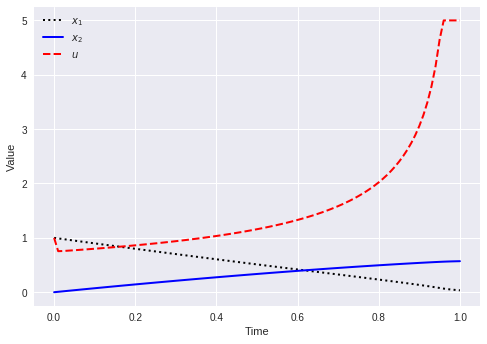

In [10]:
#@markdown ##Solution to 3 using GEKKO
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

m = GEKKO()

nt = 101
m.time = np.linspace(0,1,nt)

# Parameters
u = m.MV(value=1,ub=5,lb=0)
u.STATUS = 1

# Variables
x1 = m.Var(value=1)
x2 = m.Var(value=0)

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

# Equations
m.Equation(x1.dt()==-(u+0.5*u**2)*x1)
m.Equation(x2.dt()==u*x1)

# Objective Function
m.Obj(-x2*final)

m.options.IMODE = 6
m.solve()

print('Objective: ' + str(x2[-1]))

plt.figure(1)
plt.plot(m.time,x1.value,'k:',LineWidth=2,label=r'$x_1$')
plt.plot(m.time,x2.value,'b-',LineWidth=2,label=r'$x_2$')
plt.plot(m.time,u.value,'r--',LineWidth=2,label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [11]:
#@title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/mdefRrGarP0" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>


##Example 4</h4>
<ul><li>Batch reactor with consecutive reactions A-&gt;B-&gt;C 
</li></ul><p class='vspace'>$$\max_{T(t)} x_2 \left( t_f \right)$$
$$\mathrm{subject \; to}$$
$$\frac{dx_1}{dt}=-k_1 \, x_1^2$$
$$\frac{dx_2}{dt}=k_1 \, x_1^2 - k_2 \, x_2$$
$$k_1 = 4000 \, \exp{\left(-\frac{2500}{T}\right)}$$
$$k_2 = 6.2e5 \, \exp{\left(-\frac{5000}{T}\right)}$$
$$x(0) = [1 \; 0]^T$$
$$298 \le T \le 398$$
$$t_f=1$$
</p>
<div class='vspace'></div><h4>Solution to Benchmark 4</h4>
<div><img src='http://apmonitor.com/do/uploads/Main/download.png' alt='' title='' /> <a class='urllink' href='http://apmonitor.com/do/uploads/Main/dynamic_optimization_benchmark4.zip' rel='nofollow'>Dynamic Optimization Benchmark 4 in MATLAB and Python</a></div>

In [12]:
#@title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/yFprG0iJQUE" frameborder="0" allowfullscreen></iframe>


apm 35.231.160.17_gk_model4 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.8.7
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            2
   Connections  :            0
   Equations    :            5
   Residuals    :            3
 
 Number of state variables:            900
 Number of total equations: -          800
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            100
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

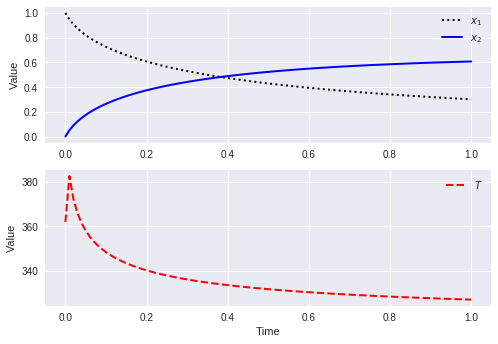

In [13]:
#@markdown ##Solution to 4 using GEKKO
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

m = GEKKO()

nt = 101
m.time = np.linspace(0,1,nt)

# Parameters
T = m.MV(value=362,ub=398,lb=298)
T.STATUS = 1
T.DCOST = 0

# Variables
x1 = m.Var(value=1)
x2 = m.Var(value=0)

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

# Intermediates
k1 = m.Intermediate(4000*m.exp(-2500/T))
k2 = m.Intermediate(6.2e5*m.exp(-5000/T))

# Equations
m.Equation(x1.dt()==-k1*x1**2)
m.Equation(x2.dt()==k1*x1**2 - k2*x2)

# Objective Function
m.Obj(-x2*final)

m.options.IMODE = 6
m.solve()

print('Objective: ' + str(x2[-1]))

plt.figure(1)

plt.subplot(2,1,1)
plt.plot(m.time,x1.value,'k:',LineWidth=2,label=r'$x_1$')
plt.plot(m.time,x2.value,'b-',LineWidth=2,label=r'$x_2$')
plt.ylabel('Value')
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.plot(m.time,T.value,'r--',LineWidth=2,label=r'$T$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')

plt.show()

In [14]:
#@title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/gptRJ5x7Ybs" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>


##Example 5
<ul><li>Catalytic reactor with A&lt;-&gt;B-&gt;C
</li></ul><p class='vspace'>$$\max_{u(t)} \left(1 - x_1 \left( t_f \right) - x_2 \left( t_f \right) \right)$$
$$\mathrm{subject \; to}$$
$$\frac{dx_1}{dt}=u \left(10 \, x_2 - x_1 \right)$$
$$\frac{dx_2}{dt}=-u \left(10 \, x_2 - x_1 \right)-\left(1-u\right) x_2$$
$$x(0) = [1 \; 0]^T$$
$$0 \le u \le 1$$
$$t_f=12$$
</p>
<div class='vspace'></div><h4>Solution to Benchmark 5</h4>
<div><img src='http://apmonitor.com/do/uploads/Main/download.png' alt='' title='' /> <a class='urllink' href='http://apmonitor.com/do/uploads/Main/dynamic_optimization_benchmark5.zip' rel='nofollow'>Dynamic Optimization Benchmark 5 in MATLAB and Python</a></div>

In [15]:
#@title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/YBlOF9ATaHI" frameborder="0" allowfullscreen></iframe>


apm 35.231.160.17_gk_model5 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.8.7
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            0
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:            900
 Number of total equations: -          800
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            100
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

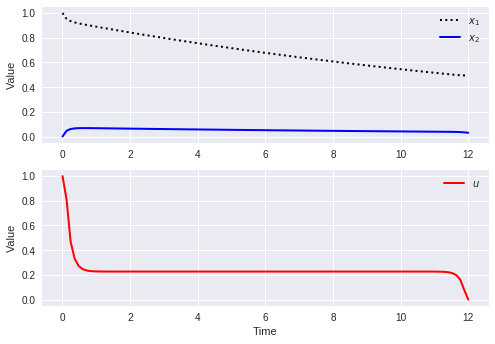

In [16]:
#@markdown ##Solution to 5 using GEKKO
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

m = GEKKO()

nt = 101
m.time = np.linspace(0,12,nt)

# Parameters
u = m.MV(value=1,ub=1,lb=0)
u.STATUS = 1
u.DCOST = 0

# Variables
x1 = m.Var(value=1)
x2 = m.Var(value=0)

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

# Equations
m.Equation(x1.dt()==u*(10*x2-x1))
m.Equation(x2.dt()==-u*(10*x2-x1)-(1-u)*x2)

# Objective Function
m.Obj(-final*(1-x1-x2))

m.options.IMODE = 6
m.solve()

print('Objective: ' + str(1-x1[-1]-x2[-1]))

plt.figure(1)

plt.subplot(2,1,1)
plt.plot(m.time,x1.value,'k:',LineWidth=2,label=r'$x_1$')
plt.plot(m.time,x2.value,'b-',LineWidth=2,label=r'$x_2$')
plt.ylabel('Value')
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.plot(m.time,u.value,'r-',LineWidth=2,label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')

plt.show()

In [17]:
#@title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/r42PEsh5Nxg" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>
